In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("/content/insurance_data.csv")
df.head()
df=df.iloc[:,2:4]
df.head()

,bmi,children
0,33.770,1
1,33.000,3
2,22.705,0
3,28.880,0
4,25.740,0


In [7]:
k=3
kmeans=KMeans(n_clusters=k,n_init=10)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [9]:
labels=kmeans.labels_
centers=kmeans.cluster_centers_
pred_cluster=kmeans.predict(df)

In [11]:
from sklearn.metrics import silhouette_score
print(kmeans.inertia_)
print(silhouette_score(df,pred_cluster))

8488.630061232776
0.4787522503036745


In [13]:
from pandas.core.common import random_state
sil_score=[]
clusters=range(2,11)
for k in clusters:
  kmeans_k=KMeans(n_clusters=k,n_init=8,random_state=10)
  kmeans_k.fit(df)
  cluster_labels=kmeans_k.predict(df)
  sil_score.append(silhouette_score(df,cluster_labels))

In [14]:
sil_data=pd.DataFrame({'Clusters:':clusters,'Silhouette-score':sil_score})
print(sil_data)

   Clusters:  Silhouette-score
0          2          0.516542
1          3          0.478995
2          4          0.437690
3          5          0.408841
4          6          0.399914
5          7          0.390611
6          8          0.368454
7          9          0.382666
8         10          0.390117


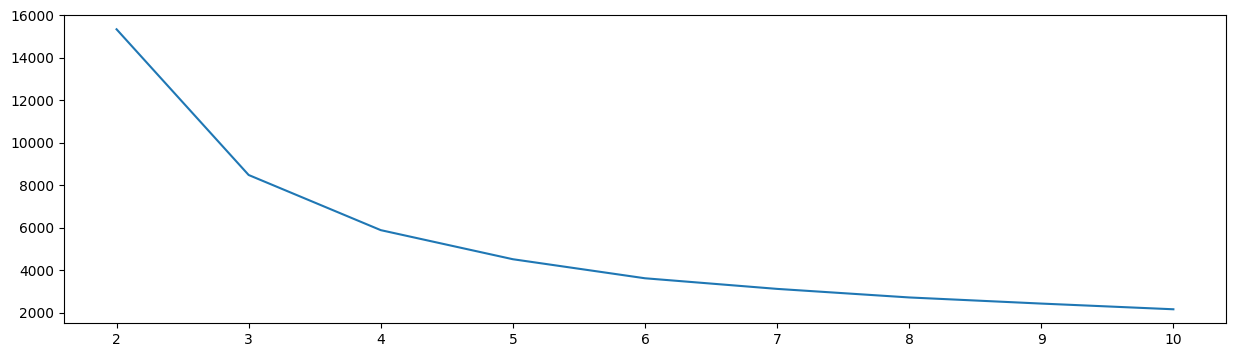

In [19]:
wcss=[]
clusters=range(2,11)
for k in clusters:
   kmeans_k=KMeans(n_clusters=k,n_init=8,random_state=10)
   kmeans_k.fit(df)
   wcss.append(kmeans_k.inertia_)
plt.figure(figsize=(15,4))
plt.plot(clusters,wcss)
plt.show()
